In [1]:
import pandas as pd
import numpy as np

#### 비만율 데이터

In [6]:
df = pd.read_csv("data/fat_rate.csv")
df.head()

,구분별(1),구분별(2),구분별(3),2009,2009.1,2009.2,2010,2010.1,2010.2,2011,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,구분별(1),구분별(2),구분별(3),전체,남자,여자,전체,남자,여자,전체,...,여자,전체,남자,여자,전체,남자,여자,전체,남자,여자
1,서울시,소계,소계,21.3,27.7,15.2,21.7,28.5,15.1,22.7,...,23.0,28.9,38.6,19.7,28.6,38.5,19.4,29.5,39.7,20.0
2,서울시,생애주기별,19~29세,13.7,21.2,6.2,13.1,21.5,4.6,15.4,...,11.1,23.2,35.1,11.8,23.5,35.1,12.5,24.2,35.3,13.9
3,서울시,생애주기별,30~44세,22.7,34.1,10.9,22.9,34.5,10.9,23.6,...,15.5,31.2,46.7,15.3,31.1,46.7,15.5,33.7,49.8,17.2
4,서울시,생애주기별,45~64세,24.1,27.7,20.7,24.4,28.7,20.3,25.5,...,25.2,30.3,40.6,20.8,30.2,40.5,20.7,29.6,40.0,20.1


In [7]:
df.columns

Index(['구분별(1)', '구분별(2)', '구분별(3)', '2009', '2009.1', '2009.2', '2010',
       '2010.1', '2010.2', '2011', '2011.1', '2011.2', '2012', '2012.1',
       '2012.2', '2013', '2013.1', '2013.2', '2014', '2014.1', '2014.2',
       '2015', '2015.1', '2015.2', '2016', '2016.1', '2016.2', '2017',
       '2017.1', '2017.2', '2018', '2018.1', '2018.2', '2019', '2019.1',
       '2019.2', '2020', '2020.1', '2020.2', '2021', '2021.1', '2021.2',
       '2022', '2022.1', '2022.2'],
      dtype='object')

In [8]:
df_target = df[(df["구분별(3)"]=="19~29세")]
target_col = ["2014","2015","2016","2017","2018","2019","2020","2021","2022"]
df_target = df_target[target_col]

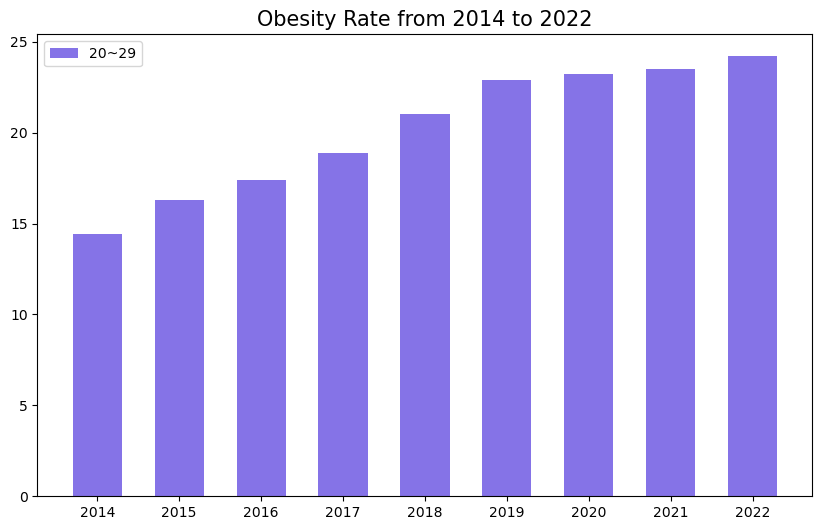

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y1 = df_target.iloc[0, :].values.astype("float")       # 첫 번째 데이터 세트


plt.figure(figsize= (10,6))
plt.bar(x, y1, width=0.6, label="20~29", color = '#8573E7')  
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 10)
plt.title("Obesity Rate from 2014 to 2022", size = 15)
plt.legend()
plt.show()

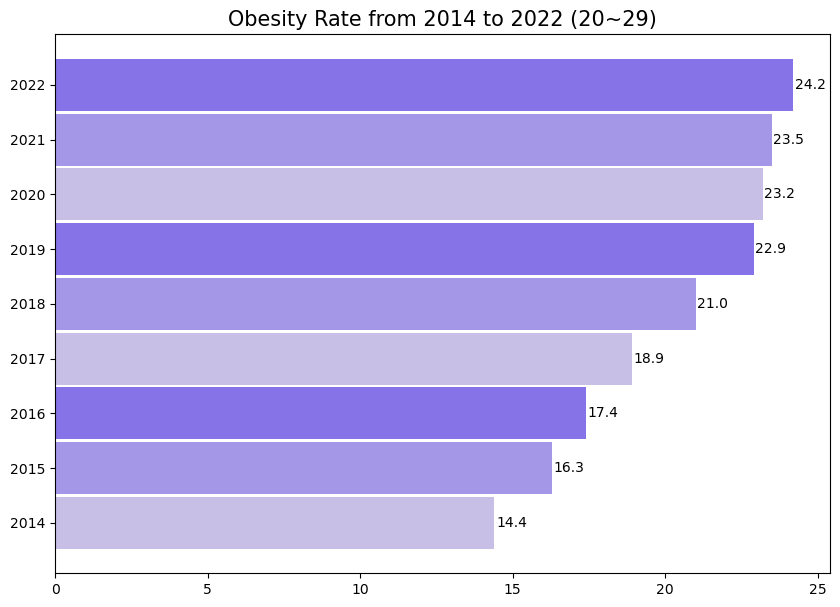

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 색상 배열 생성
colors = ['#C8BFE7', '#A597E7', '#8573E7']

# 데이터 정의
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y1 = df_target.iloc[0, :].values.astype("float") # 첫 번째 데이터 세트

# 그래프 생성
plt.figure(figsize= (10,7))
plt.barh(x, y1, height=0.95, color = colors)
plt.xlim(0,None)
plt.yticks(x, df_target.columns, fontsize = 10)
plt.title("Obesity Rate from 2014 to 2022 (20~29)", size = 15)

for i in range(len(x)):
    height = y1[i]
    plt.text(height + 0.05, x[i], '%.1f' % height, va='center', ha='left', fontsize=10)


plt.show()

In [8]:
df_dessert=pd.read_excel("data/dessert2.xlsx")

df_dessert = pd.DataFrame(df_dessert.iloc[6:])
colnames = ["date","rate"]
df_dessert = df_dessert.rename(columns = {df_dessert.columns[0]: colnames[0], df_dessert.columns[1]:colnames[1]})
df_dessert

c:\Users\kimhi\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,date,rate
6,2016-01-01,17.64705
7,2016-01-02,18.30065
8,2016-01-03,19.64869
9,2016-01-04,21.69117
10,2016-01-05,22.22222
...,...,...
2549,2022-12-18,46.93627
2550,2022-12-19,42.19771
2551,2022-12-20,44.28104
2552,2022-12-21,46.16013


#### 네이버 검색어 트렌드 데이터
##### 키워드 : 디저트

In [11]:
df_dessert["date"] = pd.to_datetime(df_dessert["date"])
df_dessert["year"] = df_dessert["date"].dt.year
df_dessert["rate"] = df_dessert["rate"].astype("float")
a = df_dessert.groupby("year")["rate"].sum()
a = a.reset_index()
a

,year,rate
0,2016,8341.29728
1,2017,8231.86095
2,2018,9318.42133
3,2019,9771.60768
4,2020,11981.41158
5,2021,13547.01628
6,2022,15374.95732


In [12]:
b = pd.DataFrame([["2014",8341.29728],["2015",8341.29728]],columns=["year","rate"])
b["rate"] = b["rate"].astype("float")
a = pd.concat([b,a]).reset_index()
a['year'] = a["year"].astype('str')

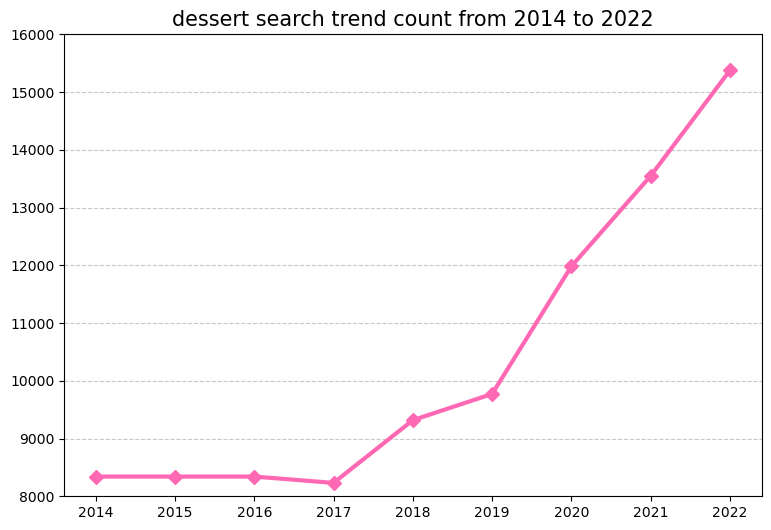

In [60]:
plt.figure(figsize= (9,6))
plt.plot(a["year"],a["rate"], linewidth = 3,
            marker='D', markersize = 7, color = 'hotpink')
plt.ylim(8000,16000)
plt.grid(True, axis='y', alpha = 0.7, linestyle = '--')
plt.title("dessert search trend count from 2014 to 2022", size = 15)

# for i in range(len(x)):
#     height = a["rate"][i]
#     plt.text(a["year"][i], height+0.9, '%i' %height, ha='center', va='bottom', size = 10)

# plt.text(a["year"][8], a["rate"][8], '%i' %height, ha='center', va='bottom', size = 11)

plt.show()

In [3]:
activity = pd.read_csv("data/유산소_신체활동_실천율_추이_20241224111255.csv",encoding="cp949")

activity_pr = activity[(activity["특성별(2)"]=="19-29세")]
activity_pr = activity_pr[activity["성별(1)"]=="전체"]
activity_pr = activity_pr[["특성별(2)","2014.1","2015.1","2016.1","2017.1","2018.1","2019.1","2020.1","2021.1","2022.1"]]
activity_pr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18240\138467034.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  activity_pr = activity_pr[activity["성별(1)"]=="전체"]


,특성별(2),2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
3,19-29세,72.3,66.7,61.9,65.6,63.8,62.1,57.8,61.2,69.2


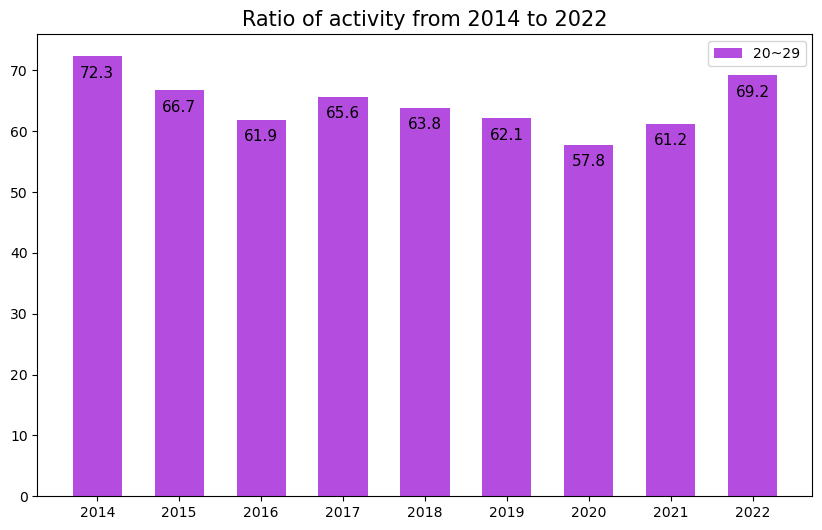

In [ ]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y0 = activity_pr.iloc[0, 1:].values.astype("float") # 첫 번째 데이터 세트

plt.figure(figsize= (10,6))
plt.bar(x, y0, width=0.6, label="20~29", color='darkviolet', alpha = 0.7)
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 10)

for i in range(len(x)):
    height = y0[i]
    plt.text(x[i], height-4, '%.1f' %height, ha='center', va='bottom', size = 11)

plt.title("Ratio of activity from 2014 to 2022", size=15)
plt.legend()
plt.show()

#### 규칙적 체육활동 참여 비율 (주 5회 이상 vs 전혀 하지 않음)
##### 전혀 하지 않음 데이터

In [33]:
exercise = pd.read_csv("data/규칙적_체육활동_참여_여부_및_빈도_20241224111528.csv",encoding="cp949")
ex1 = exercise[exercise["통계분류(1)"]=="연령별"]
ex1 = exercise[(exercise["통계분류(2)"]=="20대")]
ex1 = ex1[["통계분류(2)","2014.1","2015.1","2016","2017","2018","2019","2020","2021","2022"]]
ex1

,통계분류(2),2014.1,2015.1,2016,2017,2018,2019,2020,2021,2022
8,20대,36.5,39.6,30.9,29.9,30.8,23.8,30.3,27.6,28.7


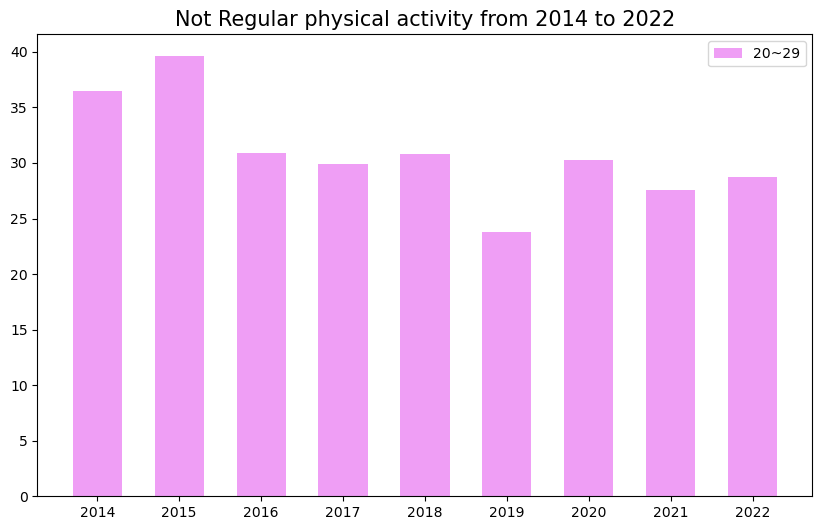

In [61]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y2 = ex1.iloc[0, 1:].values.astype("float")

plt.figure(figsize= (10,6))
plt.bar(x, y2, width= 0.6, label="20~29", color = '#EF9EF5') 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 10)
plt.title("Not Regular physical activity from 2014 to 2022", size = 15)
plt.legend()
plt.show()

##### 주 5회 이상 데이터

In [35]:
ex2 = exercise[exercise["통계분류(1)"]=="연령별"]
ex2 = exercise[(exercise["통계분류(2)"]=="20대")]
ex2 = exercise[["2014.6","2014.7","2014.8",
                "2015.6","2015.7","2015.8",
                "2016.6","2016.7","2016.8",
                "2017.6","2017.7","2017.8",
                "2018.6","2018.7","2018.8",
                "2019.6","2019.7","2019.8",
                "2020.6","2020.7","2020.8",
                "2021.6","2021.7","2021.8",
                "2022.6","2022.7","2022.8"]]

In [36]:
exercise_tr = ex2.transpose().reset_index()[8].astype('float')
exercise_tr

0      6.9
1      8.9
2      3.0
3      5.3
4      8.6
5      1.8
6     10.7
7      2.2
8      1.1
9      9.1
10     1.1
11     2.2
12     9.0
13     2.8
14     1.9
15     5.2
16     2.2
17     2.0
18     7.3
19     1.0
20     1.0
21     4.4
22     1.2
23     1.9
24     4.7
25     0.9
26     1.4
Name: 8, dtype: float64

In [37]:
exercise_up_5 = []
for i in range(0,len(exercise_tr)-2,3):
    exercise_up_5.append(exercise_tr.iloc[i]+exercise_tr.iloc[i+1]+exercise_tr.iloc[i+2])

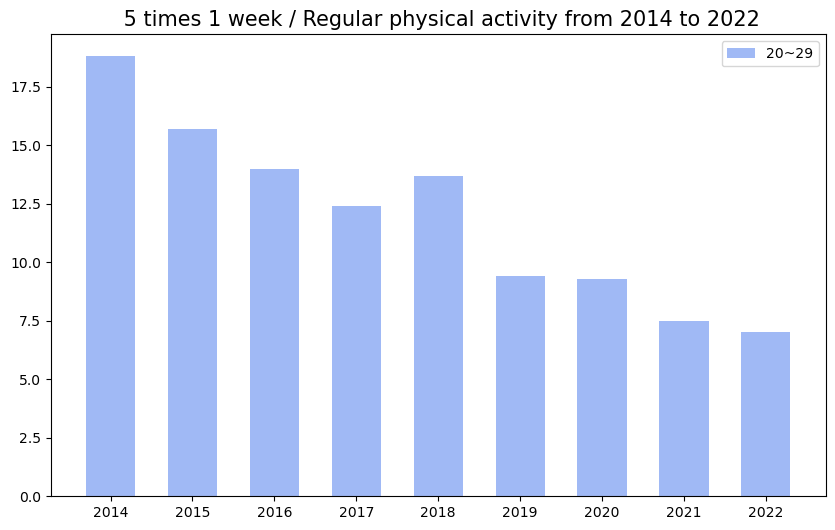

In [64]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y3 = exercise_up_5 

plt.figure(figsize= (10,6))
plt.bar(x, y3, width=0.6, label="20~29", color = '#A0B9F5') 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 10)
plt.title(" 5 times 1 week / Regular physical activity from 2014 to 2022", size = 15)
plt.legend()
plt.show()

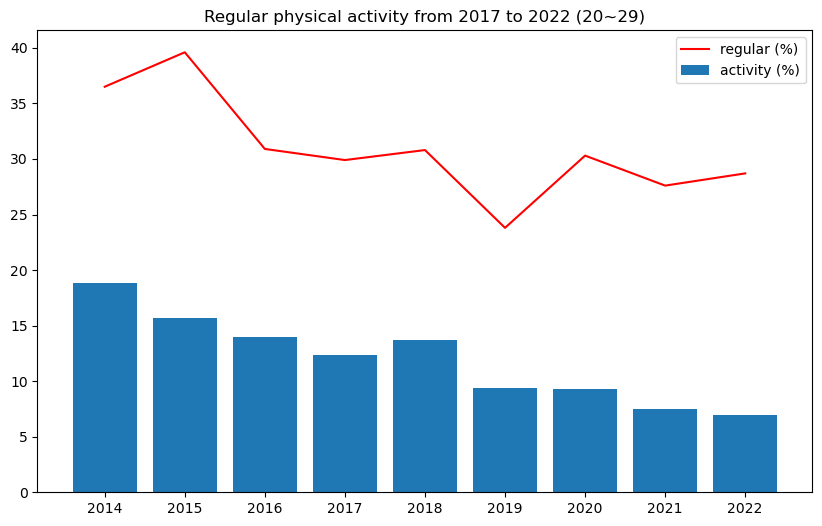

In [172]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y2 = ex1.iloc[0, 1:].values.astype("float")
y3 = exercise_up_5    

plt.figure(figsize= (10,6))
plt.xticks(x, df_target.columns, fontsize = 10)
plt.bar(x, y3, label="activity (%)") 
plt.plot(x, y2, label='regular (%)', color = 'red')
plt.title("Regular physical activity from 2017 to 2022 (20~29)")
plt.legend()

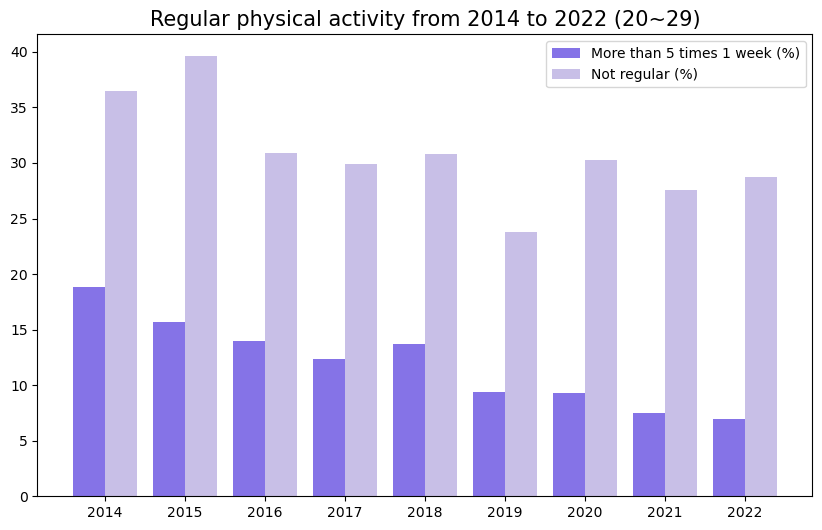

In [58]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y2 = ex1.iloc[0, 1:].values.astype("float")
y3 = exercise_up_5  

bar_width = 0.4

plt.figure(figsize= (10,6))
plt.xticks(x, df_target.columns, fontsize = 10)
plt.bar(x - bar_width/2, y3, label="More than 5 times 1 week (%)", width=bar_width, color = '#8573E7') 
plt.bar(x + bar_width/2, y2, label='Not regular (%)', width=bar_width, color = '#C8BFE7')
plt.title("Regular physical activity from 2014 to 2022 (20~29)", size = 15)
plt.legend()

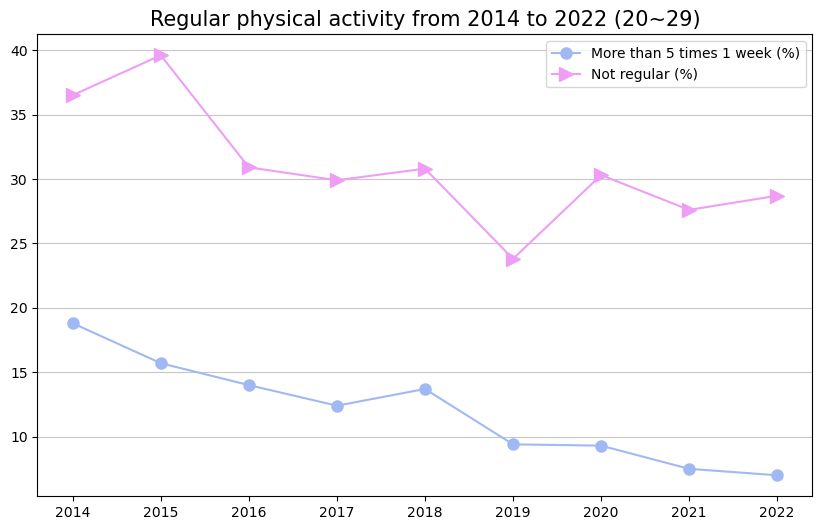

In [59]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y2 = ex1.iloc[0, 1:].values.astype("float")
y3 = exercise_up_5    

plt.figure(figsize= (10,6))
plt.xticks(x, df_target.columns, fontsize = 10)
plt.plot(x, y3, label="More than 5 times 1 week (%)", marker = 'o', markersize=8, color = '#A0B9F5') 
plt.plot(x, y2, label='Not regular (%)', marker = '>', markersize=10, color = '#EF9EF5')
plt.grid(True, axis='y', alpha = 0.7, linestyle = '-')
plt.title("Regular physical activity from 2014 to 2022 (20~29)", size = 15)
plt.legend()

#### 연간 음주율 데이터

In [42]:
drink = pd.read_csv("data/연간_음주율_추이_20241223121009.csv", encoding="cp949")

drink_pr = drink[(drink["특성별(1)"]=="연령별1") & (drink["성별(1)"]=="전체")]
drink_pr = drink_pr[(drink_pr["특성별(2)"]=="19-29세")]
drink_pr = drink_pr[["특성별(2)","2014.1","2015.1","2016.1","2017.1","2018.1","2019.1","2020.1","2021.1","2022.1"]]
drink_pr

,특성별(2),2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
3,19-29세,89.3,89.2,89.2,89.3,87.6,89.8,87.7,88.6,88.0


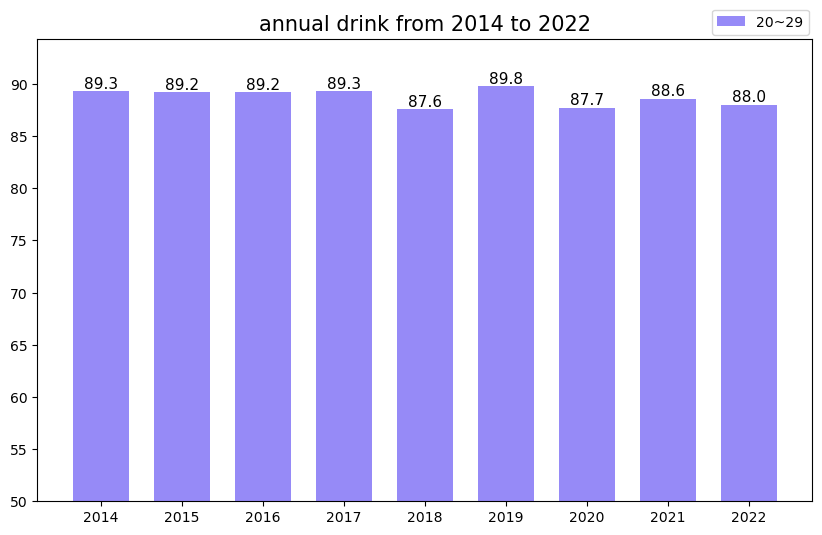

In [44]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y4 = drink_pr.iloc[0, 1:].values.astype("float")       # 첫 번째 데이터 세트

plt.figure(figsize= (10,6))
plt.bar(x, y4, width=0.7, label="20~29", color = '#6A59F5', alpha = 0.7)
plt.ylim(50,None)
plt.xticks(x, df_target.columns, fontsize = 10)

for i in range(len(x)):
    height = y4[i]
    plt.text(x[i], height, '%.1f' %height, ha='center', va='bottom', size = 11)

plt.title("annual drink from 2014 to 2022", size = 15)
plt.legend(loc=(0.87, 1.01))
plt.show()

#### 에너지 지방 과잉 소비 데이터

In [45]:
energy = pd.read_csv("data/에너지_지방과잉섭취자_분율_추이_20241224111641.csv",encoding="cp949")

energy_pr = energy[(energy["특성별(1)"]=="연령별1") & (energy["성별(1)"]=="전체")]
energy_pr = energy_pr[(energy_pr["특성별(2)"]=="19-29세")]
energy_pr = energy_pr[["특성별(2)","2014.1","2015.1","2016.1","2017.1","2018.1","2019.1","2020.1","2021.1","2022.1"]]
energy_pr

,특성별(2),2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
7,19-29세,10.4,16.8,8.6,7.4,7.3,9.9,5.9,9.0,7.5


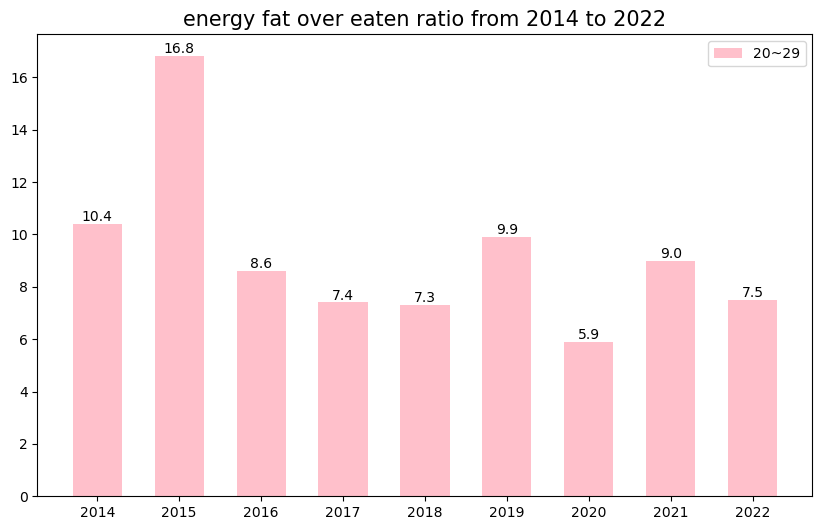

In [47]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y5 = energy_pr.iloc[0, 1:].values.astype("float")       # 첫 번째 데이터 세트

plt.figure(figsize= (10,6))
plt.bar(x, y5, width=0.6, label="20~29", color = 'pink') 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 10)
plt.title("energy fat over eaten ratio from 2014 to 2022", size = 15)

for i in range(len(x)):
    height = y5[i]
    plt.text(x[i], height, '%.1f' %height, ha='center', va='bottom', size = 10)

plt.legend()
plt.show()

#### 영양소별 1일 섭취량 추이 표준화 데이터

In [48]:
nutrition = pd.read_csv("data/영양소별_1일_섭취량_추이_표준화___만19세이상_20241223121447.csv")

kcal = nutrition["영양소별(1)"]=="에너지 (kcal)" 
sugar = nutrition["영양소별(1)"]=="당 (g)" 
nutrition_pr = nutrition[nutrition["성별(1)"]=="전체"]
nutrition_pr = nutrition_pr[(nutrition_pr["영양소별(1)"]=="에너지 (kcal)") | (nutrition_pr["영양소별(1)"]=="당 (g)" )]
nutrition_pr = nutrition_pr[["2014","2015","2016","2017","2018","2019","2020","2021","2022"]]
nutrition_pr

,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,2121.7,2174.8,2112.4,2071.8,2042.6,2004.7,1959.2,1899.5,1862.8
12,-,-,67.9,64.1,59.2,62.2,58.4,57.6,58.0


In [49]:
answer = 0
for col in nutrition_pr.columns:
    if col != '2014' and col != '2015':
        answer += float(nutrition_pr[col].iloc[1])
mean = answer/7
nutrition_pr['2014'][12],nutrition_pr['2015'][12] = mean,mean


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17728\1996466912.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nutrition_pr['2014'][12],nutrition_pr['2015'][12] = mean,mean


In [50]:
sugar_ratios = []
nutrition_pr = nutrition_pr.astype('float')
for col in nutrition_pr.columns:
    sugar_ratios.append(100*nutrition_pr[col].iloc[1]/nutrition_pr[col].iloc[0])
    
sugar_ratios = np.array(sugar_ratios)*3.867
sugar_ratios[0],sugar_ratios[1] = np.mean(sugar_ratios[2:]),np.mean(sugar_ratios[2:])

In [51]:
sugar_ratios

array([11.84187806, 11.84187806, 12.42990437, 11.96421952, 11.20759816,
       11.99817429, 11.52678644, 11.72620163, 12.04026197])

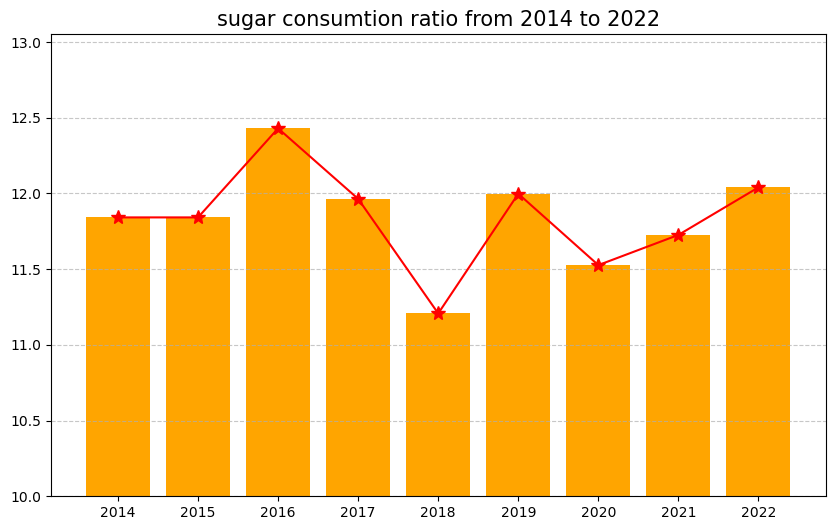

In [52]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
  
plt.figure(figsize= (10,6))
plt.grid(True, axis='y', alpha = 0.7, linestyle = '--')
plt.bar(x, sugar_ratios, width=0.8, color = 'orange')
plt.plot(x,sugar_ratios, marker= '*', markersize = 10, color = 'red')
plt.ylim(10,None)
plt.xticks(x, df_target.columns, fontsize = 10)
plt.title('sugar consumtion ratio from 2014 to 2022', size = 15)
plt.show()